# Лабораторна Робота 4
### З дисципліни "Методи глибинного навчання"
##### Виконала Неділько Дарина, група КМ-91
##### Варіант 9
**Тема:** «Розпізнавання двовимірних кольорових об’єктів за допомогою згорткової
нейронної мережі»
**Мета:** Отримання практичних навичок з розробки програмного забезпечення для
реалізації згорткової нейронної мережі, призначеної для розпізнавання двовимірних кольорових об’єктів

**Хід виконання роботи**

1. Підготовка інструментальних засобів.
Для виконання лабораторної роботи рекомендується використовувати мову програмування Python (модуль numpy, бібліотеки Keras та TensorFlow), dataset
cifar10. Комп’ютер має бути під’єднаний до мережі Internet.
2. Створення проєкту.
В лабораторній роботі використовується згорткова нейрона мережа.(СNN)
2.1. Створити програму для реалізації навчання нейромережевої моделі .
2.2. Створити програму для реалізації режиму розпізнавання нейромережевої моделі .
3. Навчання нейромережевої моделі.
Запустити програму для навчання нейромережевої моделі. Зафіксувати термін та
точність навченої нейромережевої моделі.
4. Тестування нейромережевої моделі.
Запустити програму для розпізнавання. Дослідити можливості навченої моделі в
аспекті розпізнавання різних зображень.
5. Оформити звіт з лабораторної роботи.


### **Теоретичні відомості**

Згорткова нейронна мережа, СНС, CNN – це клас глибинних штучних нейронних мереж прямого поширення, що використовуються для класифікації та розпізнавання об'єктів, облич на фотографіях, розпізнавання мови.
ЗНМ складається з шарів входу та виходу, а також із декількох прихованих шарів. Ці шари пов’язані між собою шарами з визначеними активаційними функціями. Приховані шари ЗНМ зазвичай складаються зі згорткових шарів, агрегувальних шарів, повноз'єднаних шарів та шарів нормалізації. Згорткові шари застосовують до входу операцію згортки, передаючи результат до наступного шару. Згортка імітує реакцію окремого нейрону на зоровий стимул.
![Рис 1 - Будова згорткової нейронної мережі](CNN2.png)
Згорткові нейронні мережі сприймають та обробляють дані у вигляді тензорів, що дозволяє працювати з даними зображень у природній формі. Кожне вхідне зображення має як параметри ширину та довжину, а також глибину, яка визначається кодуванням зображення. Найбільш поширеним із них є RGB-кодування, в якому колір кожного пікселя на зображенні кодується за допомогою значень 14 для трьох кольорів – червоного, зеленого та синього. Такі категорії значень, що описують зображення, називаються каналами. Інший вимір тензорів утворюється в ході роботи мережі і містить карти виявлених ознак зображення. Таким чином, згорткові нейронні мережі розглядають кожне зображення як чотиривимірний масив даних. Зазвичай для кожної мережі визначається конкретна необхідна ширина і довжина зображень, хоча також існують мережі, здатні до масштабування. Для задач розпізнавання в умовах використання великих об’ємів даних необхідно, щоб модель мала високу здатність до навчання та великий
відсоток правильних припущень щодо ознак зображення. У порівнянні з традиційними нейронними мережами прямого поширення зі схожою кількістю шарів, згорткові нейронні мережі мають вищу здатність до навчання, оскільки містять набагато менше параметрів та зв’язків. Для традиційних повнозв’язних нейронних мереж для їх правильного навчання в задачах розпізнавання образів необхідна набагато більша кількість даних, оскільки кожне вхідне зображення може мати розмірність у щонайменше кілька сотень тисяч, що вимагатиме відповідну кількість прикладів з різними значеннями для кожного виміру.

Характерним елементом згорткової нейронної мережі є операція згортки. Згортка це математична операція, що за допомогою дії ядра згортки(kernel\feachure detector) k на вхідне зображення у вигляді тензора x отримує як реазультат ознаку m (feachure map). Кожен детектор ознак складається з деякої визначеної кількості фільтрів, кожний з яких в свою чергу є тензором параметрів з розмірністю, яка як правило дозволяє покривати лише невелику частину зображення в ширину та висоту, але при цьому обов’язково має відповідати розмірності в глибину. Такі фільтри і є параметричною частиною нейронної мережі, до якої застосовується навчання.
Крім того, власне кількість фільтрів також може бути одним із гіперпараметрів нейронної мережі, оскільки збільшення кількості фільтрів веде до збільшення кількості потенційно виявлених ознак та закономірностей, але при цьому занадто велика їх кількість може призвести до повторень та знаходження ознак, які не є характеристичними, тобто до ускладнення та потенційного перенавчання моделі. Таким чином, кількість фільтрів відповідає кількості карт ознак, яка визначає глибину вихідних даних, а, отже, і глибину вхідних для наступного рівня мережі, що відповідно визначає кількість необхідних параметрів і на наступному кроці. В ході навчання фільтри набувають можливості визначати ознаки зображення, які й групуються в карти ознак. Кожен фільтр відповідає за створення однієї карти ознак. Карта ознак формується завдяки тому, що фільтр переміщується зображенням та визначає ознаки для сусідніх рецептивних полів. Крок переміщення s (англ. stride) може відрізнятися і є одним з параметрів моделі. Таким чином, хоча абсолютне положення кожної ознаки на зображення на карті і не зберігається, але це не має значення, оскільки відносне положення ознак одна відносно одної залишається сталим, і, таким чином, властивості зображення зберігаються.
Математично це можна описати як $$m(t)=(x*k)(t)=\sum^{a=+\infty}_{a=-\infty}{x(a)k(a+t)}$$ Значення кожного детектора ознак за межами визначеної області його дії вважаються нульовими, тому нескінченну суму можна замінити на
скінченну зі значеннями в заданій області.
Використовуючи властивість комутативності для операції математичної згортки, отримуємо спрощену функцію, придатну для застосування в нейронних мережах та створення детекторів для згорткового шару, та яка споріднена з взаємокореляційною функцією для значень зображення: $$M(i,j)=(K*X)(i,j)=\sum_m{\sum_n{K(m,n)X(i-m,j-n)}}$$ lt M(i,j) - елемент карти ознак з координатами i,j; X - вхідне зображення; К - детектор ознак; m,n - розмірності цього детектора.
Приклад фільтру для операції згортки для двовимірного випадку:
![Рис 2 – Приклад одновимірного фільтру для операції згортки при розмірності зображення 6x6 з трьома каналами, розміру фільтру 3, розміром кроку 1 та відсутності доповнення нулями](CNN.png)

**Розроблена модель ЗНМ** складається із 4 шарів згортки, двох шарів  субдискретизації, трьох шарів Dropout, шару перетворення вхідних даних, повнозв’язного шару та вихідного шару. Порядок зазначений у коді під блоком з теоретичними відомостями. У шарах згортки функцією активації виступає ReLU. $$ReLU(x) = max(0,x)$$ ![Рис 3 – Графік функції ReLU](ReLU.png)
У повнозв’язному шарі - Softmax. $$\sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K$$ ![Рис 4 – Графік функції Softmax](softmax.png)
Тренування моделі здійснюється за допомогою методу стохастичного градієнтного спуску.



Навчання згорткової мережі у рамках цієї лабораторної роботи буде відбуватися на CIFAR-10 датасеті. Це датасет для задач комп'ютерного зору. Він складається з 60 тисяч кольорових зображень розміром 32х32 що містять у собі зображення 10 класів. 1
![Рис 5 - Приклади зображень у CIFAR-10](data.png)


Data sample with labels


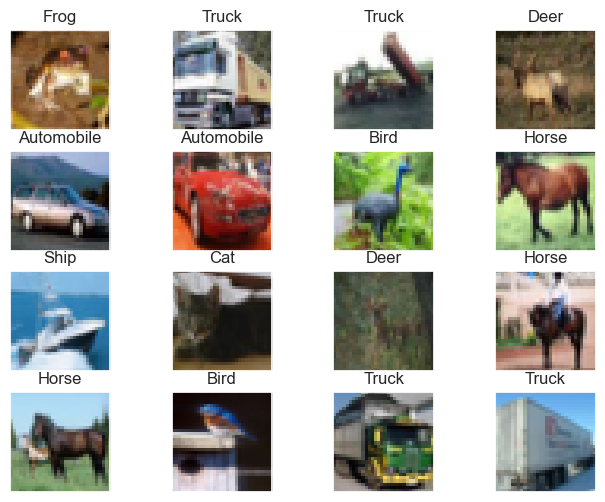

In [11]:
import time
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
numpy.random.seed(42)
# Завантаження даних
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
# Виведення декількох зображень із CIFAR-10
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(8, 6))
index = 0
print('Data sample with labels')
for i in range(4):
    for j in range(4):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()


In [3]:
# Розмір міні-вибірки
batch_size = 32
# Кількість класів зображень
nb_classes = 10
# Кількість епох навчання
nb_epoch = 25
# Розмір зображення
img_rows, img_cols = 32, 32
# Кількість каналів: RGB
img_channels = 3
# Нормалізація даних
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
# Створення нейромережевої моделі
model = Sequential()
# Перший шар згортки
model.add(Conv2D(32, (3, 3), padding='same',
 input_shape=(32, 32, 3), activation='relu'))
# Друний шар згортки
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Перший шар субдискретизаії
model.add(MaxPooling2D(pool_size=(2, 2)))
# Перший шар Dropout
model.add(Dropout(0.25))
# Третій шар згортки
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертий шар згортки
model.add(Conv2D(64, (3, 3), activation='relu'))
# Другий шар субдисктеризації
model.add(MaxPooling2D(pool_size=(2, 2)))
# Другий шар Dropout
model.add(Dropout(0.25))
# Шар перетворення вхідних даних
model.add(Flatten())
# Повнозв’язний шар
model.add(Dense(512, activation='relu'))
# Третій шар Dropout
model.add(Dropout(0.5))
# Вихідний шар
model.add(Dense(nb_classes, activation='softmax'))
# Параметри оптимізації
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
 optimizer=sgd,
 metrics=['accuracy'])
# Навчання моделі
t0 = time.time()
model.fit(X_train, Y_train,
 batch_size=batch_size,
 epochs=nb_epoch,
 validation_split=0.1,
 shuffle=True,
 verbose=2)
t1 = time.time()
# Оцінка якості навчання на тестових даних
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))
print(f"Time spent on data training {t1-t0}")
# Збереження моделі
model.save('my_model.h5')

Epoch 1/25
1407/1407 - 112s - loss: 1.7455 - accuracy: 0.3592 - val_loss: 1.4456 - val_accuracy: 0.4728 - 112s/epoch - 80ms/step
Epoch 2/25
1407/1407 - 115s - loss: 1.3390 - accuracy: 0.5141 - val_loss: 1.1640 - val_accuracy: 0.5864 - 115s/epoch - 82ms/step
Epoch 3/25
1407/1407 - 115s - loss: 1.1538 - accuracy: 0.5871 - val_loss: 0.9684 - val_accuracy: 0.6528 - 115s/epoch - 82ms/step
Epoch 4/25
1407/1407 - 111s - loss: 1.0308 - accuracy: 0.6314 - val_loss: 0.9107 - val_accuracy: 0.6822 - 111s/epoch - 79ms/step
Epoch 5/25
1407/1407 - 113s - loss: 0.9415 - accuracy: 0.6656 - val_loss: 0.8391 - val_accuracy: 0.7082 - 113s/epoch - 80ms/step
Epoch 6/25
1407/1407 - 113s - loss: 0.8787 - accuracy: 0.6940 - val_loss: 0.7656 - val_accuracy: 0.7346 - 113s/epoch - 80ms/step
Epoch 7/25
1407/1407 - 118s - loss: 0.8251 - accuracy: 0.7123 - val_loss: 0.7274 - val_accuracy: 0.7436 - 118s/epoch - 84ms/step
Epoch 8/25
1407/1407 - 121s - loss: 0.7892 - accuracy: 0.7237 - val_loss: 0.7336 - val_accuracy: 

Модель натренована, точність передбачень на тестових даних 76.43%. Час, що знадобився на тренування моделі за умови паралельного використання пристрою на виконання інших задач - 2908 секунд, тобто приблизно 49 хв. Подивимося тепер яку точність передбачень видає модель для кожного класу.

313/313 [==============================] - 5s 16ms/step


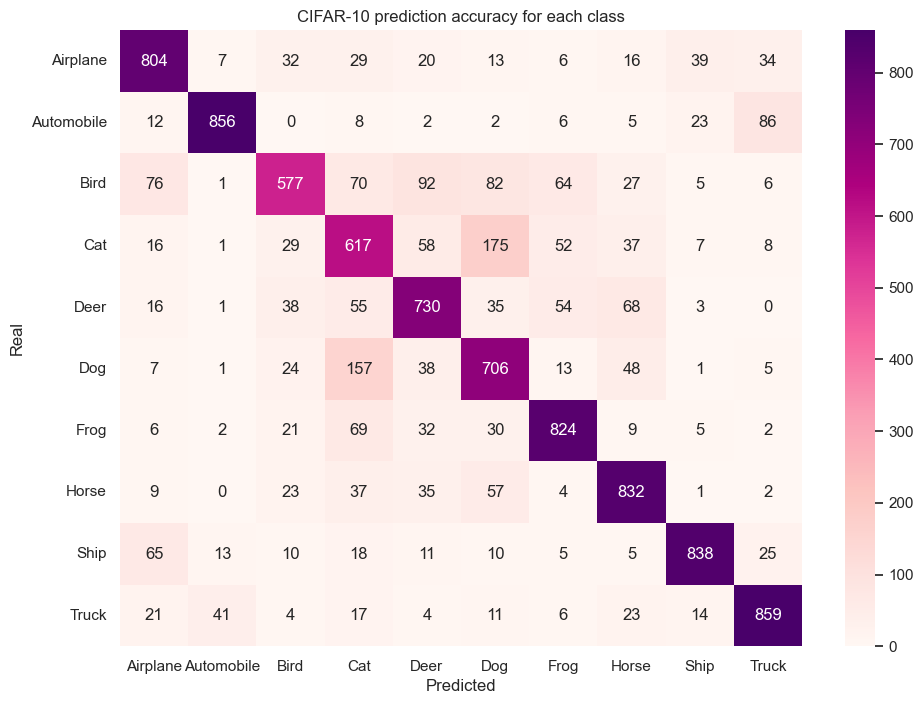

In [12]:
from keras.models import load_model
model = load_model('my_model.h5')
predict_x=model.predict(X_test)
classes_x=numpy.argmax(predict_x,axis=1)
plt.figure(figsize=(11, 8))
sns.heatmap(confusion_matrix(y_test, classes_x), xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap='RdPu')
plt.title('CIFAR-10 prediction accuracy for each class')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

Тепер подивимося на неправильно визначені дображення

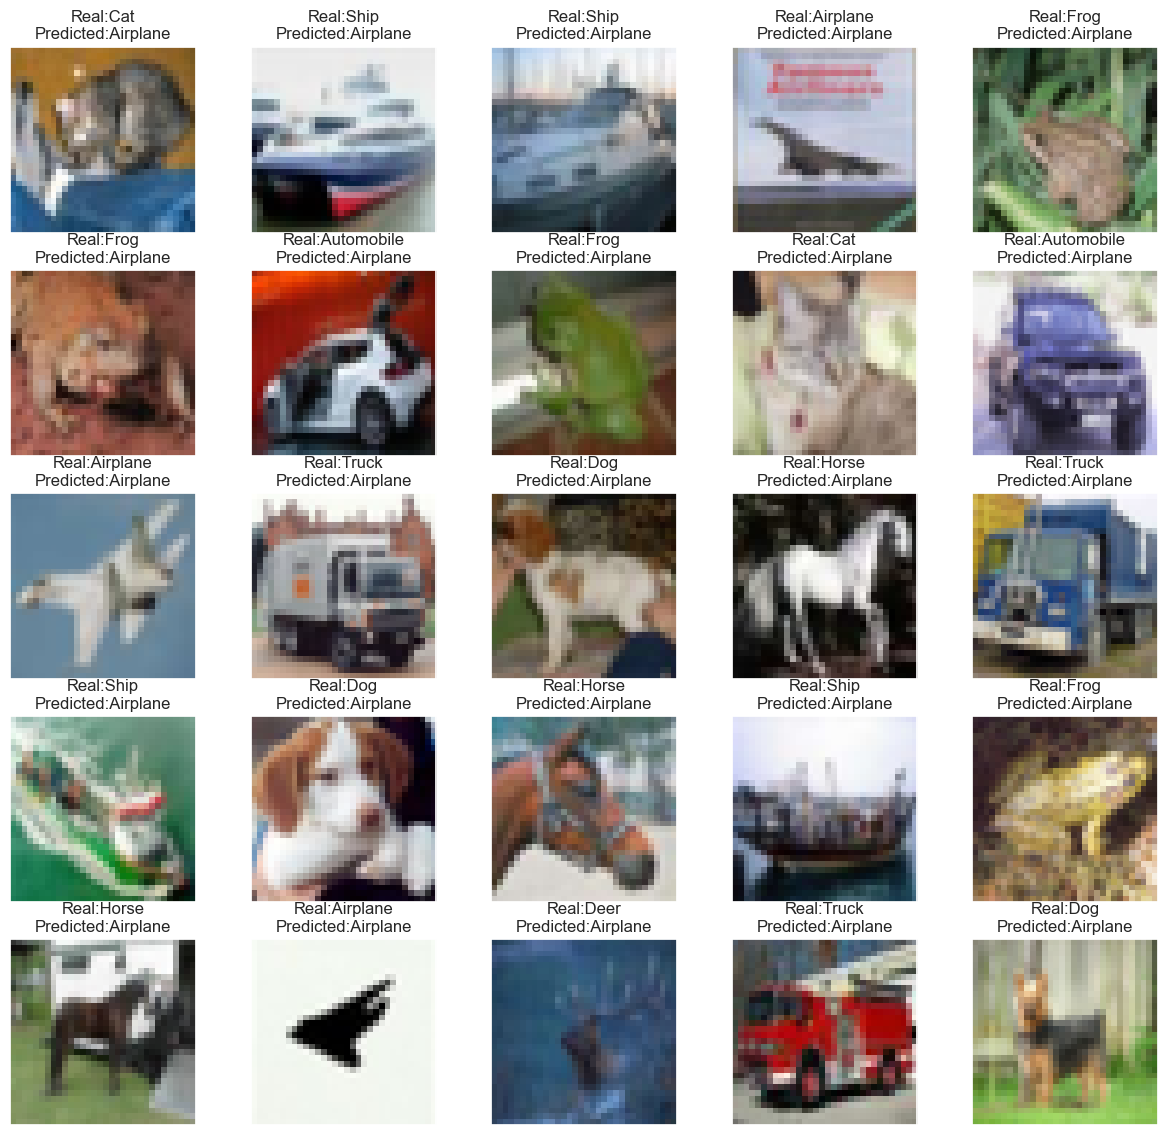

In [26]:
predict_x = predict_x.astype(int)
fig, axes = plt.subplots(ncols=5, nrows=5, sharex=False,
    sharey=True, figsize=(15, 14))
index = 0
for i in range(5):
    for j in range(5):
        axes[i,j].set_title('Real:' + labels[y_test[index][0]] + '\n' + 'Predicted:' + labels[predict_x[index][0]])
        axes[i,j].imshow(X_test[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()


### **Висновок**

У ході лабораторної роботи було розглянуто та натреновану згорткову нейронну мережу. На практиці було застосовано набуті на лекціях знання. Натренована модель показала точність розпізнавання 76%.
